In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [2]:
# Import libraries
df = pd.read_csv("rainfall in india 1901-2015.csv").fillna(value=0)

In [3]:
tn_df = df[df['SUBDIVISION'] == "TAMIL NADU"]

In [4]:
data = np.asarray(tn_df[['FEB', 'MAR', 'APR', 'MAY']])

In [5]:
# Prepare the input and target variables
features, target = None, None
for i in range(data.shape[1] - 3):
    if features is None:
        features = data[:, i:i+3]
        target = data[:, i+3]
    else:
        features = np.concatenate((features, data[:, i:i+3]), axis=0)
        target = np.concatenate((target, data[:, i+3]), axis=0)

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [7]:
# Train the random forest regressor
rf = RandomForestRegressor(n_estimators=100, max_depth=10, n_jobs=1)

In [8]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_jobs=1)

In [9]:
# Make predictions on the test set
y_pred = rf.predict(X_test)

In [10]:
# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(mae)

20.33105042660553


In [11]:
# Prepare data for plotting
xx = np.arange(start=0, stop=len(y_pred), step=1)

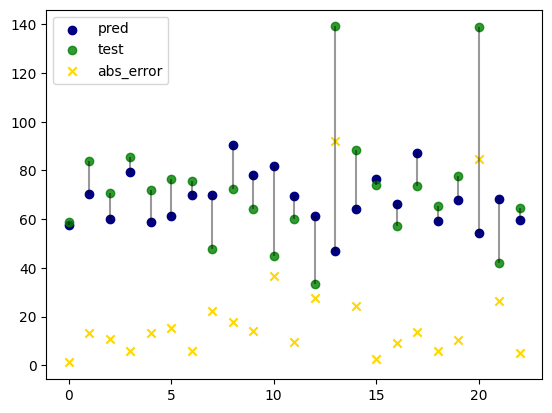

In [12]:
# Create the plot
plt.vlines(x=xx, ymin=y_pred, ymax=y_test, color='black', alpha=0.4)
plt.scatter(xx, y_pred, color='navy', alpha=1, label='pred')
plt.scatter(xx, y_test, color='green', alpha=0.8, label='test')
plt.scatter(xx, np.abs(y_pred - y_test), color='gold', label='abs_error', marker='x')
plt.legend()